In [1]:
from sklearn.preprocessing import StandardScaler
from pycaret.regression import *
import pandas as pd
import numpy as np

In [2]:
ver2 = pd.read_csv('0918_umap_one_hot.csv').drop(['STRG_DT'], axis=1)
ver2_cont = ver2.drop(['cluster_1', 'cluster_2'], axis=1)
ver2_cat = ver2[['cluster_1', 'cluster_2']]

y_val = np.array(ver2_cont.iloc[:, 0]).reshape(-1, 1)
x_val = ver2_cont.drop(['FRST_TREE_CNT'], axis=1)

In [3]:
from sklearn.model_selection import train_test_split

x_train_val, x_test_val = train_test_split(x_val, test_size= 0.2, shuffle = False)
y_train_val, y_test_val = train_test_split(y_val, test_size= 0.2, shuffle = False)

train_cat, test_cat = train_test_split(ver2_cat, test_size= 0.2, shuffle = False)
test_cat = test_cat.reset_index().drop(['index'], axis=1)

In [4]:
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train_val)
y_test_scaled = y_scaler.transform(y_test_val)

x_scaler = StandardScaler()
x_train_scaled = x_scaler.fit_transform(x_train_val)
x_test_scaled = x_scaler.transform(x_test_val)

In [5]:
y_train_df = pd.DataFrame(y_train_scaled, columns = ['FRST_TREE_CNT'])
x_train_df = pd.DataFrame(x_train_scaled, columns = x_val.columns)

y_test_df = pd.DataFrame(y_test_scaled, columns = ['FRST_TREE_CNT'])
x_test_df = pd.DataFrame(x_test_scaled, columns = x_val.columns)

In [6]:
train_df = pd.concat([y_train_df, x_train_df, train_cat], axis=1)
test_df = pd.concat([y_test_df, x_test_df, test_cat], axis=1)

In [7]:
df2 = pd.concat([train_df, test_df]).reset_index().drop(['index'], axis=1)

In [8]:
#Setup 설정
model2 = setup(df2, target = 'FRST_TREE_CNT', train_size = 0.8, data_split_shuffle = False)

,Description,Value
0,Session id,6767
1,Target,FRST_TREE_CNT
2,Target type,Regression
3,Original data shape,"(26064, 10)"
4,Transformed data shape,"(26064, 10)"
5,Transformed train set shape,"(20851, 10)"
6,Transformed test set shape,"(5213, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [10]:
comp2 = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.5998,0.6926,0.6951,-7.0941,0.3644,2.3815,0.4250
gbr,Gradient Boosting Regressor,0.6464,0.7248,0.7373,-7.7417,0.3720,2.7182,0.5340
lightgbm,Light Gradient Boosting Machine,0.6362,0.7683,0.7444,-8.0743,0.3825,2.3298,0.1370
ada,AdaBoost Regressor,0.6585,0.7834,0.7564,-7.6766,0.3658,2.8392,0.2680
catboost,CatBoost Regressor,0.6522,0.7647,0.7620,-8.0926,0.3780,2.6901,3.3080
rf,Random Forest Regressor,0.6668,0.8807,0.8052,-9.7323,0.3958,2.5422,0.8110
xgboost,Extreme Gradient Boosting,0.7015,0.8863,0.8261,-9.7540,0.4122,2.9444,0.1620
knn,K Neighbors Regressor,0.6933,0.8533,0.8365,-10.7142,0.4199,2.8876,0.0670
dt,Decision Tree Regressor,0.6972,0.9624,0.8700,-10.8690,0.4148,2.6969,0.0330
en,Elastic Net,0.8206,1.1881,0.8870,-11.2149,0.4670,1.1273,0.0250


<br/> Extra Tree Regressor

In [11]:
et_model = create_model('et', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.2134,0.0759,0.2754,-2.2016,0.0863,0.0897


In [12]:
et_tuned = tune_model(et_model, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2137,0.0702,0.2650,-1.2950,0.1313,1.9994
1,0.2846,0.1188,0.3446,-0.2482,0.1728,1.5048
2,0.3680,0.1678,0.4096,-0.9999,0.2144,0.3832
3,0.5378,0.3291,0.5736,-0.0788,0.2642,0.5187
4,0.5695,0.4698,0.6854,-6.1091,0.3839,0.5527
5,0.6015,0.4706,0.6860,-1.1001,0.3597,2.6262
6,0.2752,0.1295,0.3599,-5.2845,0.1866,1.0060
7,0.3608,0.1978,0.4448,-2.3949,0.3211,6.8159
8,0.5790,0.4680,0.6841,-1.5034,0.3898,2.3253


[I 2023-09-25 04:48:16,056] Searching the best hyperparameters using 20851 samples...
[I 2023-09-25 06:04:47,226] Finished hyperparameter search!


In [13]:
et_final = finalize_model(et_tuned)

In [14]:
predict_model(et_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0905,0.0125,0.1119,0.4719,0.0343,0.0401


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,1,0,-2.201073,-2.211623
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,1,0,-2.201073,-2.211398
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,1,0,-2.201073,-2.211174
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,1,0,-2.201073,-2.212970
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,1,0,-2.201073,-2.213419
...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,1,0,-2.324533,-2.290413
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,1,0,-2.324533,-2.289964
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,1,0,-2.324533,-2.289066
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,1,0,-2.324533,-2.285923


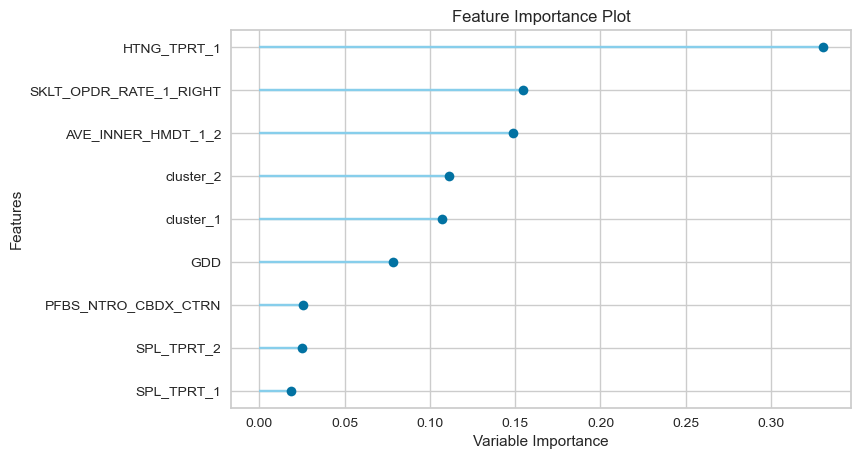

In [15]:
plot_model(et_final, plot='feature')

In [16]:
save_model(et_final, 'Extra_Tree_UMAP_KF')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  ExtraTreesRegressor(bootstrap=True, criterion='absolute_error',
                                      max_depth=10,
                                      max_features=0.8973345606108913,
                                      min_impurity

In [9]:
Extra_Tree_UMAP_KF = load_model('Extra_Tree_UMAP_KF', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Gradient Boosting Regressor

In [18]:
gbr_model = create_model('gbr', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.5294,0.6470,0.8044,-26.3112,0.3273,0.2278


In [19]:
gbr_tuned = tune_model(gbr_model, search_library = 'optuna', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2190,0.0839,0.2897,-1.7419,0.1396,2.0748
1,0.2860,0.1160,0.3406,-0.2192,0.1734,2.1748
2,0.4489,0.2409,0.4908,-1.8716,0.2600,0.4361
3,0.5941,0.4474,0.6689,-0.4669,0.3056,0.4809
4,0.6017,0.5014,0.7081,-6.5874,0.3987,0.5631
5,0.4955,0.3489,0.5907,-0.5569,0.3438,2.0980
6,0.2808,0.1373,0.3706,-5.6642,0.1912,1.0074
7,0.5238,0.4129,0.6426,-6.0854,0.4256,9.5810
8,0.5628,0.4395,0.6630,-1.3508,0.3873,2.3442


[I 2023-09-25 06:32:18,077] Searching the best hyperparameters using 20851 samples...
[I 2023-09-25 06:40:21,763] Finished hyperparameter search!


In [20]:
gbr_final = finalize_model(gbr_tuned)

In [21]:
predict_model(gbr_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.1800,0.0428,0.2069,-0.8060,0.0631,0.0758


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,1,0,-2.201073,-2.042111
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,1,0,-2.201073,-2.042111
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,1,0,-2.201073,-2.044522
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,1,0,-2.201073,-2.042111
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,1,0,-2.201073,-2.042643
...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,1,0,-2.324533,-2.080976
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,1,0,-2.324533,-2.083734
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,1,0,-2.324533,-2.083734
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,1,0,-2.324533,-2.083734


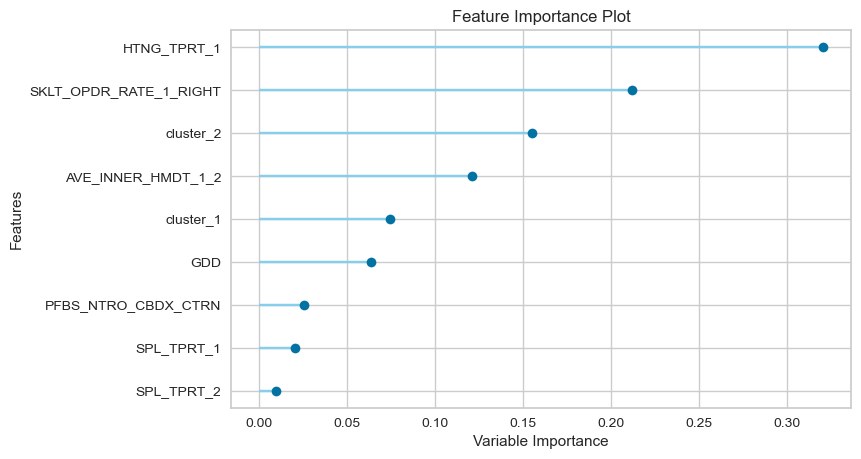

In [22]:
plot_model(gbr_final, plot='feature')

In [23]:
save_model(gbr_final, 'Gradient_Boosting_UMAP_KF')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  GradientBoostingRegressor(learning_rate=0.038508961141716654,
                                            max_depth=7,
                                            max_features=0.42507295453447763,
                                        

In [10]:
Gradient_Boosting_UMAP_KF = load_model('Gradient_Boosting_UMAP_KF', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Light GBM Regressor

In [25]:
gbm_model = create_model('lightgbm', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.4884,0.5942,0.7708,-24.0790,0.3206,0.2102


In [26]:
gbm_tuned = tune_model(gbm_model, search_library = 'optuna', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1767,0.0534,0.2312,-0.7457,0.1259,1.6289
1,0.2926,0.1100,0.3317,-0.1559,0.1786,1.9571
2,0.5971,0.4261,0.6527,-4.0793,0.3735,0.5510
3,0.7519,0.8780,0.9370,-1.8787,0.4730,0.5051
4,0.6827,0.6237,0.7897,-8.4371,0.4644,0.5999
5,0.6585,0.5400,0.7349,-1.4099,0.3253,2.5640
6,0.2735,0.1345,0.3668,-5.5298,0.1770,0.9135
7,0.3723,0.2268,0.4763,-2.8926,0.3236,6.1252
8,0.3643,0.2156,0.4644,-0.1534,0.2909,1.5403


[I 2023-09-25 06:40:53,335] Searching the best hyperparameters using 20851 samples...
[I 2023-09-25 06:44:42,050] Finished hyperparameter search!


In [27]:
gbm_final = finalize_model(gbm_tuned)

In [28]:
predict_model(gbm_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.4230,0.1981,0.4451,-7.3610,0.1425,0.1808


[LightGBM] [Warning] feature_fraction is set=0.7092335493222811, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7092335493222811
[LightGBM] [Warning] bagging_fraction is set=0.8201528817874717, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8201528817874717
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,1,0,-2.201073,-1.851343
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,1,0,-2.201073,-1.851343
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,1,0,-2.201073,-1.851343
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,1,0,-2.201073,-1.851343
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,1,0,-2.201073,-1.851343
...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,1,0,-2.324533,-1.854821
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,1,0,-2.324533,-1.854821
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,1,0,-2.324533,-1.854821
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,1,0,-2.324533,-1.854821


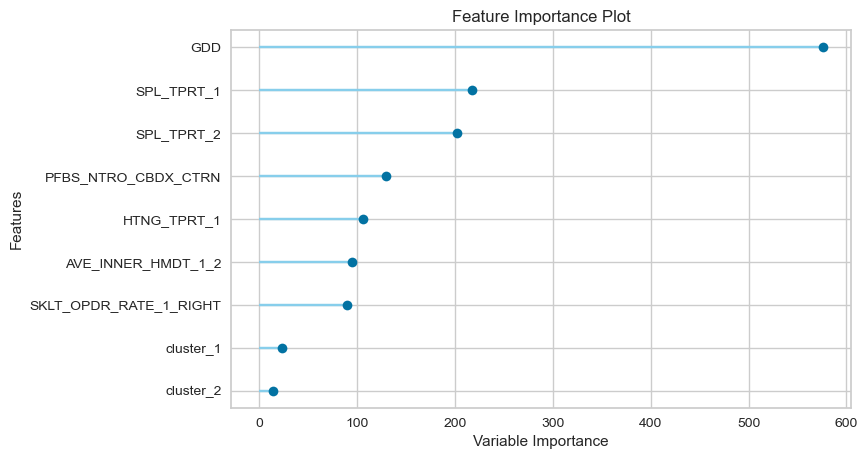

In [29]:
plot_model(gbm_final, plot='feature')

In [30]:
save_model(gbm_final, 'Light_GBM_UMAP_KF')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy..._frequent'))),
                 ('actual_estimator',
                  LGBMRegressor(bagging_fraction=0.8201528817874717,
                                bagging_freq=7,
                                feature_fraction=0.7092335493222811,
                                learning_rate=0.06460711785500349,
     

In [11]:
Light_GBM_UMAP_KF = load_model('Light_GBM_UMAP_KF', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Cat Boost Regressor

In [32]:
cb_model = create_model('catboost', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.3509,0.2093,0.4575,-7.8339,0.1505,0.1484


In [33]:
cb_tuned = tune_model(cb_model, search_library = 'optuna', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1470,0.0407,0.2018,-0.3300,0.1159,1.2637
1,0.3298,0.1657,0.4071,-0.7417,0.2172,2.4415
2,0.4514,0.2639,0.5137,-2.1455,0.2712,0.4866
3,0.5308,0.3710,0.6091,-0.2162,0.2757,0.4380
4,0.6125,0.5248,0.7244,-6.9413,0.4048,0.5819
5,0.5695,0.4430,0.6656,-0.9770,0.3396,2.3867
6,0.3237,0.1942,0.4407,-8.4256,0.1991,1.1561
7,0.5031,0.4693,0.6851,-7.0543,0.4267,9.1112
8,0.7174,0.6790,0.8240,-2.6318,0.4398,2.6217


[I 2023-09-25 06:44:53,766] Searching the best hyperparameters using 20851 samples...
[I 2023-09-25 07:34:22,019] Finished hyperparameter search!


In [34]:
cb_final = finalize_model(cb_tuned)

In [35]:
predict_model(cb_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.0543,0.0056,0.0749,0.7630,0.0232,0.0238


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,1,0,-2.201073,-2.172691
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,1,0,-2.201073,-2.182934
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,1,0,-2.201073,-2.165529
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,1,0,-2.201073,-2.157675
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,1,0,-2.201073,-2.163307
...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,1,0,-2.324533,-2.329673
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,1,0,-2.324533,-2.331802
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,1,0,-2.324533,-2.324188
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,1,0,-2.324533,-2.343256


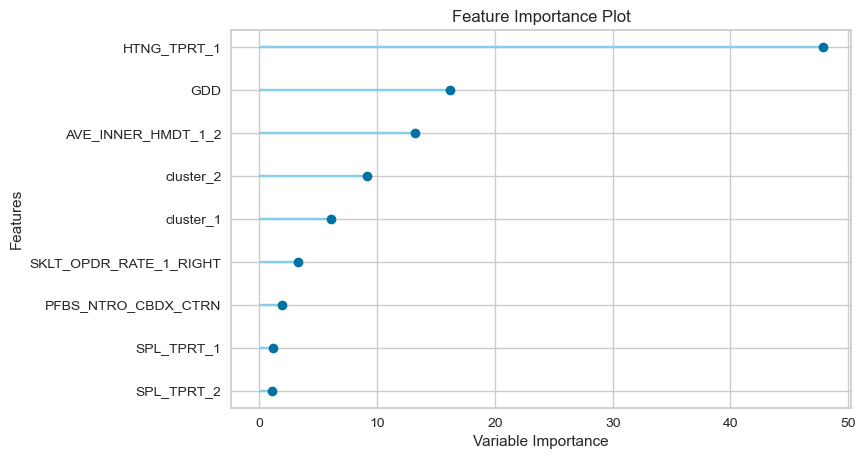

In [36]:
plot_model(cb_final, plot='feature')

In [37]:
save_model(cb_final, 'Cat_Boost_UMAP_KF')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  <catboost.core.CatBoostRegressor object at 0x00000180DB2E6580>)]),
 'Cat_Boost_UMAP_KF.pkl')

In [12]:
Cat_Boost_UMAP_KF = load_model('Cat_Boost_UMAP_KF', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Ada Regressor

In [39]:
ada_model = create_model('ada', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.4760,0.4916,0.7011,-19.7487,0.2667,0.2041


In [40]:
ada_tuned = tune_model(ada_model, search_library = 'optuna', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1325,0.0322,0.1795,-0.0525,0.0932,1.0786
1,0.3925,0.2012,0.4486,-1.1148,0.2374,2.7951
2,0.3741,0.1487,0.3856,-0.7721,0.1950,0.3766
3,0.6169,0.5637,0.7508,-0.8481,0.3472,0.4293
4,0.5380,0.4871,0.6979,-6.3703,0.2942,0.5161
5,0.6554,0.6118,0.7821,-1.7300,0.3491,3.1325
6,0.2908,0.1680,0.4099,-7.1536,0.1818,1.0463
7,0.6825,0.5368,0.7327,-8.2121,0.4832,11.4206
8,0.5925,0.4801,0.6929,-1.5677,0.4181,2.8307


[I 2023-09-25 07:36:34,734] Searching the best hyperparameters using 20851 samples...
[I 2023-09-25 07:50:21,904] Finished hyperparameter search!


In [41]:
ada_final = finalize_model(ada_tuned)

In [42]:
predict_model(ada_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,0.1253,0.0197,0.1404,0.1685,0.0428,0.0551


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,1,0,-2.201073,-2.279644
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,1,0,-2.201073,-2.279644
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,1,0,-2.201073,-2.279644
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,1,0,-2.201073,-2.279644
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,1,0,-2.201073,-2.279644
...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,1,0,-2.324533,-2.279644
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,1,0,-2.324533,-2.279644
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,1,0,-2.324533,-2.279644
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,1,0,-2.324533,-2.279644


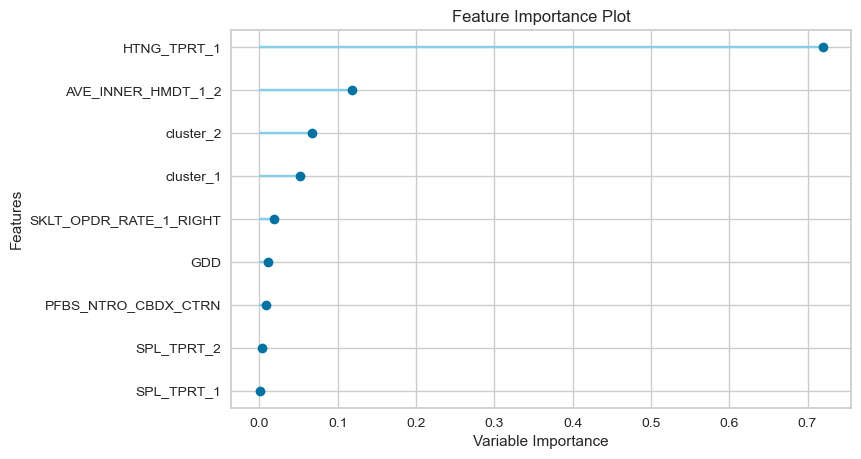

In [43]:
plot_model(ada_final, plot='feature')

In [44]:
save_model(ada_final, 'ADA_UMAP_KF')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  AdaBoostRegressor(learning_rate=0.4513573352486282,
                                    loss='square', n_estimators=10,
                                    random_state=3822))]),
 'ADA_UMAP_KF.pkl')

In [13]:
ADA_UMAP_KF = load_model('ADA_UMAP_KF', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Random Forest Regressor

In [46]:
rf_model = create_model('rf', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.5150,0.7556,0.8693,-30.8930,0.3988,0.2203


In [47]:
rf_tuned = tune_model(rf_model, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2004,0.0582,0.2412,-0.9000,0.1186,1.8177
1,0.2732,0.1065,0.3264,-0.1194,0.1536,2.2213
2,0.4550,0.2418,0.4917,-1.8822,0.2601,0.4277
3,0.6237,0.5593,0.7479,-0.8338,0.3475,0.4466
4,0.5851,0.4657,0.6824,-6.0467,0.3926,0.5404
5,0.5799,0.4342,0.6589,-0.9377,0.3465,2.3653
6,0.2316,0.1478,0.3844,-6.1717,0.1490,0.7931
7,0.6003,0.4288,0.6548,-6.3579,0.4457,10.4544
8,0.4739,0.3311,0.5754,-0.7711,0.3571,2.2392


[I 2023-09-25 07:50:48,292] Searching the best hyperparameters using 20851 samples...
[I 2023-09-25 09:19:29,124] Finished hyperparameter search!


In [48]:
rf_final = finalize_model(rf_tuned)

In [49]:
predict_model(rf_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.1512,0.0316,0.1777,-0.3334,0.0546,0.0654


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,1,0,-2.201073,-2.266764
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,1,0,-2.201073,-2.266764
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,1,0,-2.201073,-2.266312
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,1,0,-2.201073,-2.266312
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,1,0,-2.201073,-2.266312
...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,1,0,-2.324533,-2.277103
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,1,0,-2.324533,-2.277103
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,1,0,-2.324533,-2.277103
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,1,0,-2.324533,-2.277103


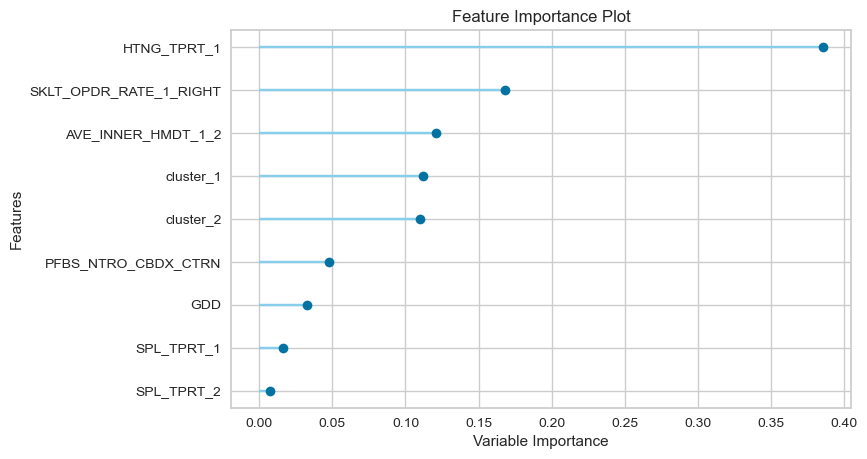

In [50]:
plot_model(rf_final, plot='feature')

In [51]:
save_model(rf_final, 'Random_Forest_UMAP_KF')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  RandomForestRegressor(bootstrap=False, max_depth=4,
                                        max_features=0.43973277714935305,
                                        min_impurity_decrease=0.00018699246192892315,
                         

In [14]:
Random_Forest_UMAP_KF = load_model('Random_Forest_UMAP_KF', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> XGBoost Regressor

In [53]:
xgb_model = create_model('xgboost', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.5730,0.7414,0.8610,-30.2939,0.3662,0.2465


In [54]:
xgb_tuned = tune_model(xgb_model, search_library = 'optuna', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2220,0.0673,0.2593,-1.1971,0.1366,2.2403
1,0.3529,0.1498,0.3870,-0.5739,0.2004,2.4612
2,0.4389,0.2263,0.4757,-1.6982,0.2496,0.4469
3,0.6013,0.4661,0.6827,-0.5281,0.3131,0.4811
4,0.5351,0.4385,0.6622,-5.6346,0.3661,0.5025
5,0.6373,0.5304,0.7283,-1.3669,0.3472,2.8153
6,0.3412,0.2201,0.4691,-9.6801,0.2084,1.2280
7,0.7348,0.6256,0.7910,-9.7364,0.5083,11.9559
8,0.6064,0.4863,0.6973,-1.6010,0.3990,2.5070


[I 2023-09-25 09:20:19,406] Searching the best hyperparameters using 20851 samples...
[I 2023-09-25 09:22:45,494] Finished hyperparameter search!


In [55]:
xgb_final = finalize_model(xgb_tuned)

In [56]:
predict_model(xgb_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.1356,0.0292,0.1708,-0.2309,0.0524,0.0591


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,1,0,-2.201073,-2.248632
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,1,0,-2.201073,-2.248632
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,1,0,-2.201073,-2.248632
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,1,0,-2.201073,-2.248632
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,1,0,-2.201073,-2.248632
...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,1,0,-2.324533,-2.366557
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,1,0,-2.324533,-2.388131
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,1,0,-2.324533,-2.392980
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,1,0,-2.324533,-2.416047


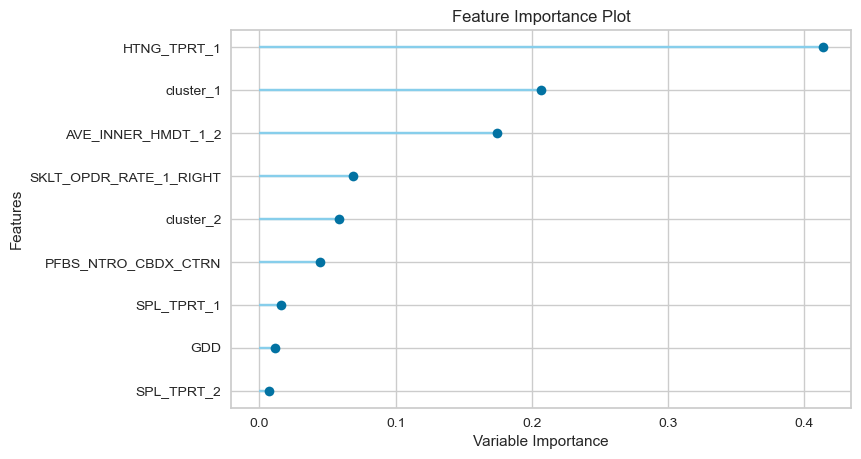

In [57]:
plot_model(xgb_final, plot='feature')

In [58]:
save_model(xgb_final, 'XGBoost_UMAP_KF')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.15756054172690992, max_bin=None,
                               max_

In [15]:
XGBoost_UMAP_KF = load_model('XGBoost_UMAP_KF', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Model Ensemble 1

In [16]:
Blend1_UMAP_KF = blend_models([Gradient_Boosting_UMAP_KF, Random_Forest_UMAP_KF, Extra_Tree_UMAP_KF], choose_better=True, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2008,0.0618,0.2486,-1.0198,0.1245,1.8599
1,0.2692,0.0948,0.3080,0.0034,0.1583,1.8643
2,0.4203,0.2081,0.4561,-1.4802,0.2389,0.4087
3,0.5830,0.4257,0.6525,-0.3958,0.2970,0.4782
4,0.5833,0.4694,0.6851,-6.1027,0.3889,0.5496
5,0.5572,0.4072,0.6381,-0.8171,0.3654,2.3462
6,0.2536,0.1250,0.3535,-5.0657,0.1645,0.9007
7,0.4625,0.3099,0.5567,-4.3182,0.3893,8.8888
8,0.5321,0.3934,0.6272,-1.1041,0.3735,2.2903


Original model was better than the blended model, hence it will be returned. NOTE: The display metrics are for the blended model (not the original one).


In [17]:
Blend1_tuned = tune_model(Blend1_UMAP_KF, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2840,0.1180,0.3435,-2.8538,0.1824,2.8167
1,0.2931,0.1210,0.3479,-0.2717,0.1806,1.4473
2,0.3641,0.1669,0.4085,-0.9898,0.2143,0.3782
3,0.5393,0.3316,0.5758,-0.0870,0.2653,0.5158
4,0.5806,0.4782,0.6915,-6.2360,0.3899,0.5610
5,0.6288,0.5049,0.7106,-1.2532,0.3533,2.7495
6,0.2494,0.1158,0.3403,-4.6200,0.1751,0.8890
7,0.3711,0.2059,0.4537,-2.5328,0.3295,7.1064
8,0.5082,0.3715,0.6095,-0.9872,0.3589,2.1047


[I 2023-09-25 12:27:51,546] Searching the best hyperparameters using 20851 samples...
[I 2023-09-25 13:57:13,821] Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [18]:
UMAP_KF_ENS1 = finalize_model(Blend1_tuned)

In [19]:
predict_model(UMAP_KF_ENS1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0905,0.0125,0.1119,0.4719,0.0343,0.0401


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,1,0,-2.201073,-2.211623
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,1,0,-2.201073,-2.211398
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,1,0,-2.201073,-2.211174
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,1,0,-2.201073,-2.212970
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,1,0,-2.201073,-2.213419
...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,1,0,-2.324533,-2.290413
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,1,0,-2.324533,-2.289964
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,1,0,-2.324533,-2.289066
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,1,0,-2.324533,-2.285923


In [20]:
save_model(UMAP_KF_ENS1, 'UMAP_KF_ENS1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  ExtraTreesRegressor(bootstrap=True, criterion='absolute_error',
                                      max_depth=10,
                                      max_features=0.8973345606108913,
                                      min_impurity

In [21]:
UMAP_KF_ENS1 = load_model('UMAP_KF_ENS1', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Model Ensemble 2

In [22]:
Blend2_UMAP_KF = blend_models([Cat_Boost_UMAP_KF, ADA_UMAP_KF, Extra_Tree_UMAP_KF], choose_better=True, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1301,0.0303,0.1740,0.0103,0.1110,1.0741
1,0.3085,0.1192,0.3453,-0.2529,0.1741,2.1149
2,0.3921,0.1765,0.4202,-1.1046,0.2175,0.4100
3,0.5606,0.3980,0.6309,-0.3050,0.2852,0.4598
4,0.5654,0.4673,0.6836,-6.0704,0.3693,0.5420
5,0.5979,0.4834,0.6953,-1.1574,0.3570,2.6351
6,0.2668,0.1422,0.3771,-5.9010,0.1770,0.9522
7,0.4641,0.3342,0.5781,-4.7346,0.3967,9.0185
8,0.6192,0.4959,0.7042,-1.6522,0.4062,2.5725


Original model was better than the blended model, hence it will be returned. NOTE: The display metrics are for the blended model (not the original one).


In [23]:
Blend2_tuned = tune_model(Blend2_UMAP_KF, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2499,0.0919,0.3032,-2.0032,0.1466,2.4032
1,0.2904,0.1251,0.3537,-0.3146,0.1790,1.6151
2,0.3751,0.1703,0.4126,-1.0298,0.2157,0.3856
3,0.5342,0.3216,0.5671,-0.0544,0.2620,0.5240
4,0.5697,0.4665,0.6830,-6.0592,0.3844,0.5532
5,0.6160,0.4882,0.6987,-1.1785,0.3596,2.7058
6,0.2522,0.1190,0.3450,-4.7774,0.1764,0.9100
7,0.3752,0.2179,0.4668,-2.7399,0.3343,7.2145
8,0.5489,0.4254,0.6522,-1.2753,0.3763,2.2150


[I 2023-09-25 16:52:48,936] Searching the best hyperparameters using 20851 samples...
[I 2023-09-25 18:00:58,001] Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [24]:
UMAP_KF_ENS2 = finalize_model(Blend2_UMAP_KF)

In [25]:
predict_model(UMAP_KF_ENS2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0905,0.0125,0.1119,0.4719,0.0343,0.0401


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,1,0,-2.201073,-2.211623
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,1,0,-2.201073,-2.211398
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,1,0,-2.201073,-2.211174
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,1,0,-2.201073,-2.212970
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,1,0,-2.201073,-2.213419
...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,1,0,-2.324533,-2.290413
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,1,0,-2.324533,-2.289964
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,1,0,-2.324533,-2.289066
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,1,0,-2.324533,-2.285923


In [26]:
save_model(UMAP_KF_ENS2, 'UMAP_KF_ENS2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\outtr\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  ExtraTreesRegressor(bootstrap=True, criterion='absolute_error',
                                      max_depth=10,
                                      max_features=0.8973345606108913,
          

In [27]:
UMAP_KF_ENS2 = load_model('UMAP_KF_ENS2', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Model Ensemble 3

In [28]:
Blend3_UMAP_KF = blend_models([Extra_Tree_UMAP_KF, Cat_Boost_UMAP_KF], choose_better=True, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1513,0.0408,0.2021,-0.3342,0.1081,1.3288
1,0.2883,0.1183,0.3440,-0.2433,0.1840,1.8405
2,0.4020,0.2033,0.4509,-1.4234,0.2361,0.4278
3,0.5334,0.3422,0.5849,-0.1218,0.2659,0.4768
4,0.5865,0.4840,0.6957,-6.3234,0.3916,0.5627
5,0.5846,0.4517,0.6721,-1.0156,0.3512,2.5021
6,0.2734,0.1463,0.3825,-6.1003,0.1818,0.9795
7,0.4092,0.2971,0.5451,-4.0983,0.3687,7.9190
8,0.6344,0.5462,0.7391,-1.9216,0.4098,2.4479


Original model was better than the blended model, hence it will be returned. NOTE: The display metrics are for the blended model (not the original one).


In [29]:
Blend3_tuned = tune_model(Blend3_UMAP_KF, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3438,0.1643,0.4053,-4.3680,0.2198,3.5344
1,0.2474,0.0928,0.3046,0.0253,0.1562,1.5156
2,0.3802,0.1730,0.4159,-1.0622,0.2181,0.3734
3,0.6046,0.4804,0.6931,-0.5749,0.3193,0.4780
4,0.6065,0.4875,0.6982,-6.3763,0.4010,0.5664
5,0.6739,0.5564,0.7459,-1.4829,0.3314,2.7789
6,0.2247,0.1062,0.3260,-4.1562,0.1708,0.7321
7,0.4247,0.2500,0.5000,-3.2907,0.3585,7.9604
8,0.4415,0.2758,0.5252,-0.4752,0.3293,1.9987


[I 2023-09-25 22:04:30,607] Searching the best hyperparameters using 20851 samples...
[I 2023-09-25 22:32:52,730] Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [30]:
UMAP_KF_ENS3 = finalize_model(Blend3_UMAP_KF)

In [31]:
predict_model(UMAP_KF_ENS3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0905,0.0125,0.1119,0.4719,0.0343,0.0401


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,1,0,-2.201073,-2.211623
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,1,0,-2.201073,-2.211398
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,1,0,-2.201073,-2.211174
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,1,0,-2.201073,-2.212970
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,1,0,-2.201073,-2.213419
...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,1,0,-2.324533,-2.290413
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,1,0,-2.324533,-2.289964
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,1,0,-2.324533,-2.289066
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,1,0,-2.324533,-2.285923


In [32]:
save_model(UMAP_KF_ENS3, 'UMAP_KF_ENS3')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\outtr\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  ExtraTreesRegressor(bootstrap=True, criterion='absolute_error',
                                      max_depth=10,
                                      max_features=0.8973345606108913,
          

In [33]:
UMAP_KF_ENS3 = load_model('UMAP_KF_ENS3', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded
